# 차원 축소

- 아주 많은 피쳐로 구성된 다차원 데이터 셋
  - 이것을 축소해서 새로운 차원의 데이터셋으로 생성하는 것
  - shape를 줄인다
- 통상적인 관점
  - 차원이 증가 -> 데이터포인트들 간의 거리가 기하급수적으로 멀어진다 ->
  최소한의 구조를 가진다 -> 학습한 모델은 신뢰성을 가질 수 없다
  - 피쳐가 많으면 개별 피쳐 간 상관관계가 높을 가능성이 크다
    - 상관관계가 높아지면 -> 다중공산성 문제가 발생 -> 모델을 신뢰할 수 없다
      -> 예측 성능 저하
  

- 데이터에 대한 신뢰성을 얻고 예측 정확도를 높이는 목적

- 벙법
  - 피쳐 선택 : feature selection
    - 특정 피쳐에 종속성이 강한 피쳐는 제거(상관관계가 있는)
    - 데이터의 특성을 잘 나타내는 것만 사용
    - 피쳐의 조합, 순서의 조합 등 구성(s/w로 처리)
  - 피쳐 추출 : feature extraction
    - 차원축소 파트
    - **기존피쳐에서 중요피쳐로 압축하여 추출하는 것**
    - 기존 피쳐와는 전혀 다른 성격의 데이터
    - **압축 -> 피쳐를 함축적으로 더 잘 설명할 수 있는 공간에 맵핑하여 추출하는 것**
      - PCA, SVD, NMF: 잠재요소를 찾는 알고리즘
        - 활용
          - 문서 내 단어들의 구성속에 있는 시멘틱의 의미 표현
          - 토픽 등을 찾는



# PCA

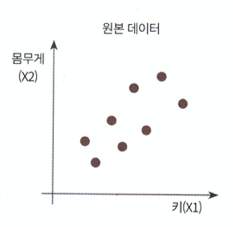

In [1]:
from IPython.core.display import Image
Image('/content/drive/MyDrive/ComputerProgramming/0411_res/pca_1.png')
# 데이터가 분포되어 있다

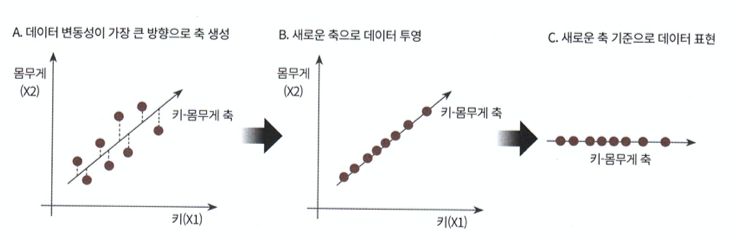

In [2]:
Image('/content/drive/MyDrive/ComputerProgramming/0411_res/pca_2.png')
# 데이터의 변동성이 가장 큰 방향으로 축을 생성
# 새로운 축에 데이터를 투영 -> 추출

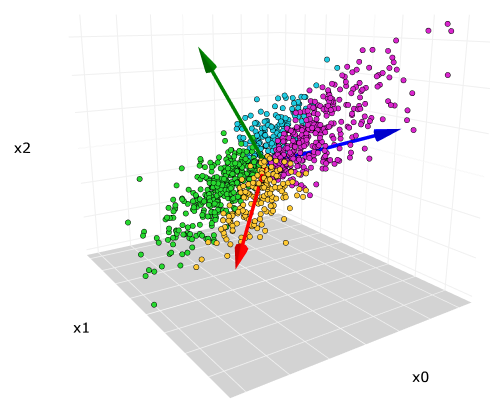

In [3]:
Image('/content/drive/MyDrive/ComputerProgramming/0411_res/pca_3.png')
# 1. 가장 큰 데이터 변동성을 가진 첫번째 벡터 축을 생성(파랑색 축)
# 2. 두번째 축은 1번 축에 기반으로 직교벡터(90도)로 축을 생성
# 3. 세번째 축은 2번 축에 직각이 되는 벡터를 구해서 축을 설정, 데이터를 투영

# => 데이터의 변동성이 가장 큰 축에 데이터를 투영하는 절차이다 

- 내부 처리 절차
  - 입력 데이터셋의 공분산 행렬 생성
    - 입력 데이터 x1에 대한 분산
      - 평균에서 얼마나 떨어져 있는지 데이터가 얼마나 퍼져 있는지 체크
    - **공분산, x1, x2 예를 들어 2개의 데이터 포인트들이 얼마나 흩어져 있는지 그 상관관계를 표현**한 것
      - 차원을 표현하기 위해 공분산 행렬 표현
      - **공분산 행렬을 통해 흩어진 관계를 확인하고, 데이터의 변동성이 높은 축을 생성하는 재료가 된다**
      - 이를 통해서 첫번째 벡터축이 완성
    - 공분산 행렬의 고유 벡터, 고유값등을 계산해서 직교행렬(90도)로 두번째 축을 생성
    - 이런 고유값은 큰 값 순으로 PCA에서 제시하는 변환치수만큼(기본값 3) 고유벡터를 계속 추출
    - 마지막 3차축에 데이터를 투영하므로써 입력데이터 변환 처리를 완료

- 주성분 분석
  - Principal Component Analysis
  - **여러 변수들 간에 존재하는 상관관걔를 이용하여 이 변수들을 대표하는 주성분을 추출하여, 차원을 축소하는 기법**

In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
cols_name = ['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width']

In [10]:
iris_df = pd.DataFrame( iris.data, columns=cols_name)
iris_df['target'] = iris.target
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


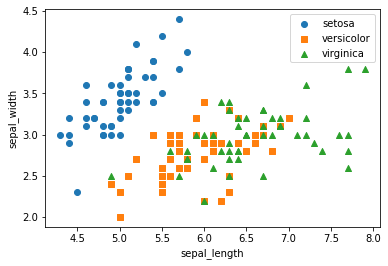

In [14]:
# 기본 데이터 분포
markers = ['o', 's','^']

for i, marker in enumerate(markers) :
  x = iris_df[iris_df['target'] == i]['sepal_length']
  y = iris_df[iris_df['target'] == i]['sepal_width']
  plt.scatter(x, y, marker = marker, label = iris.target_names[i])
  pass


plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

- setosa는 sepal_length 3.0~ 6.0 사이에 분포되어 있다
- versicolor, virginica는 데이터가 많이 겹쳐있어 분류하기 어려운 조건이다
- 이런 케이스를 피쳐별로 체크
  - PCA등 차원축소 기법을 적용하여야 한다



- 전처리기 활용
  - StandardScaler : 전체데이터를 평균 0, 표준편차가 1이 되도록 모든 값을 조정, 단 이상치 존재시 균형잡는게 쉽지 않다
  - RoBustScaler : 중앙값이 0이 되게끔 중앙에 50%의 데이터들이 분포하고, IQR값이 1이 되도록 조정하는 스케일러 
  - MinMaxScaler : 최대값 1, 0, 최소값이 0.0이 되도록 데이터를 변환, 0~1 사이에 데이터가 존재, 이상치가 크게 있다면 대부부의 데이터들이 밀집하는 문제가 발생
  - MaxAbaScaler : 0을 기준으로 절대값이 가장 큰 값을 1 혹은 -1로 조정하여 변환

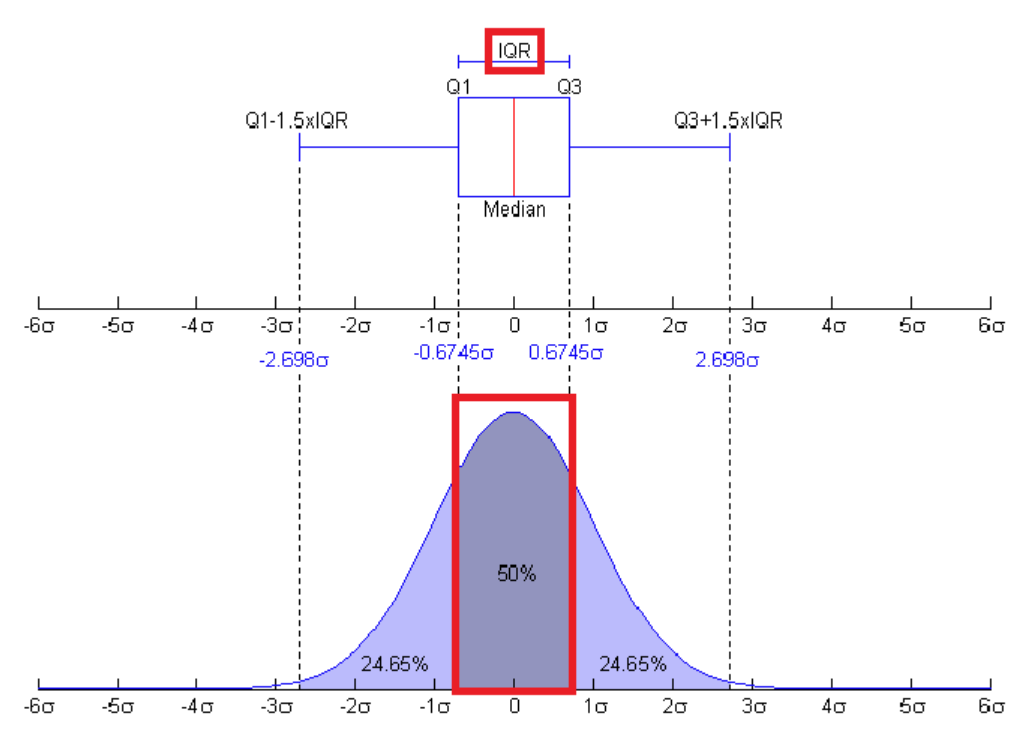

In [15]:
Image('/content/drive/MyDrive/ComputerProgramming/0411_res/pca_4_IQR.png')

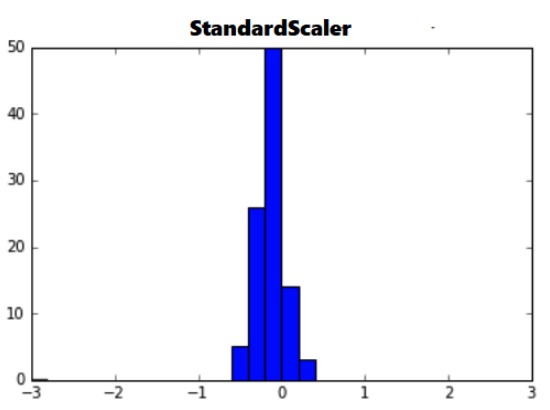

In [17]:
Image('/content/drive/MyDrive/ComputerProgramming/0411_res/pca_5_SS.png')

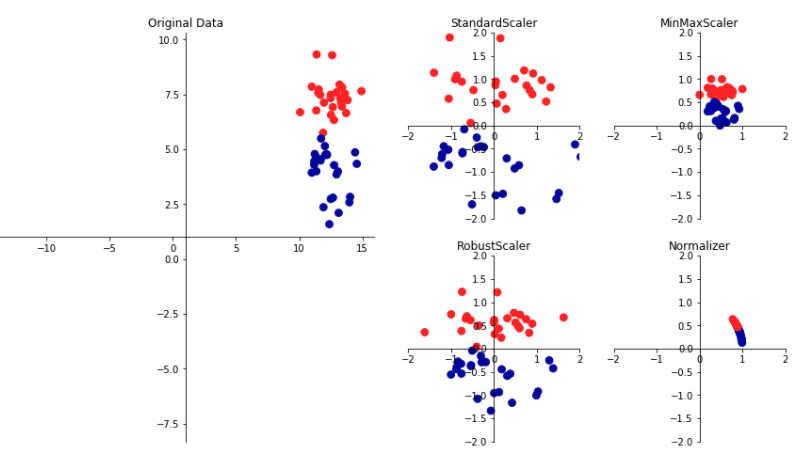

In [18]:
Image('/content/drive/MyDrive/ComputerProgramming/0411_res/pca_6_SS2.png')

- 피쳐 처리 전략
  - 이상치, 결측치 처리
  - 분산 및 표준편차를 보고 스케일링을 진행
  - 피쳐간격 상관관계를 분석 -> 독립적인 변수들만 생존
  - 조합, 순서의 문제 -> 시뮬레이션 
  - 차원축소를 통해 피쳐를 대변하는 대표값 추출

In [22]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df)
iris_scaled.shape

(150, 5)

In [27]:
# 피처만 가지고 진행하게끔 정답을 제거
del iris_df['target']
iris_df.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [23]:
iris_scaled[0]
# StandardScaler를 이용해 데이터 분포가 조정되었다 => 균형

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 , -1.22474487])

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components = 2)

In [26]:
pca.fit(iris_scaled)

PCA(n_components=2)

In [28]:
iris_pca = pca.transform(iris_scaled)
iris_pca.shape

(150, 2)

In [30]:
# df 구성
iris_df_pca = pd.DataFrame(iris_pca, columns = ['pca_c1', 'pca_c2'])
iris_df_pca['target'] = iris.target
iris_df_pca.head(1)

,pca_c1,pca_c2,target
0,-2.57612,0.474499,0


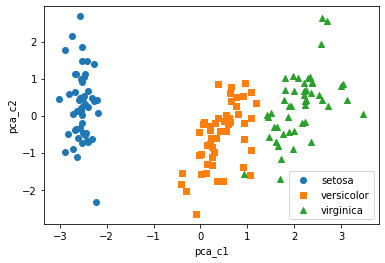

In [33]:
# 기본 데이터 분포
markers = ['o', 's','^']

for i, marker in enumerate(markers) :
  x = iris_df_pca[iris_df_pca['target'] == i]['pca_c1']
  y = iris_df_pca[iris_df_pca['target'] == i]['pca_c2']
  plt.scatter(x, y, marker = marker, label = iris.target_names[i])
  pass


plt.legend()
plt.xlabel('pca_c1')
plt.ylabel('pca_c2')
plt.show()

In [34]:
# PCA의 분산비율
pca.explained_variance_ratio_

array([0.76740358, 0.18282727])

In [35]:
# 분류의 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [37]:
# 원본 데이터 가지고 평가
rfc = RandomForestClassifier(random_state = 1)
scores = cross_val_score(rfc, iris.data, iris.target, scoring = 'accuracy', cv = 3)
scores

array([0.98, 0.94, 0.98])

In [38]:
X = iris_df_pca[['pca_c1','pca_c1']]

In [39]:
# PCA 데이터를 가지고 평가
scores = cross_val_score(rfc, X, iris.target, scoring = 'accuracy', cv = 3)
scores

# 데이터가 작아서, 명확하게 PCA를 사용하고 성능이 증가하지는 않았다
# RandomForestClassifier random_state 난수 시드값이 일정 부분영향

array([0.98, 1.  , 1.  ])

# LDA

- 입력 데이터들을 결정하는 클래스(정답, 레이블)들을 최대치로 분리할수 있도록 그 축을 찾는 방식
  - vs PCA : 데이터 변동성이 가장 큰축을 찾는 방식
  - 군집끼리는 최대한 멀리 떨어지게, 같은 클레스(군집내는)최대한 밀진하게 차원축소 하는것이 목표

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [41]:
# 스케일된 데이터
iris_scaled = StandardScaler().fit_transform(iris.data)

In [42]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit( iris_scaled, iris.target )

LinearDiscriminantAnalysis(n_components=2)

In [43]:
iris_lda = lda.transform( iris_scaled )
iris_lda.shape

(150, 2)

In [45]:
iris_df_lda = pd.DataFrame(iris_lda, columns = ['lda_1','lda_2'])
iris_df_lda['target'] = iris.target
iris_df_lda.head(2)

,lda_1,lda_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0


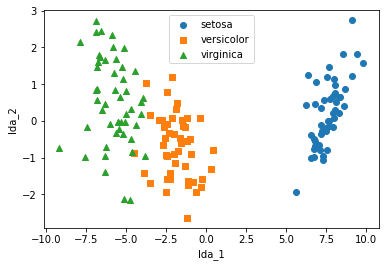

In [47]:
# 기본 데이터 분포
markers = ['o', 's','^']

for i, marker in enumerate(markers) :
  x = iris_df_lda[iris_df_lda['target'] == i]['lda_1']
  y = iris_df_lda[iris_df_lda['target'] == i]['lda_2']
  plt.scatter(x, y, marker = marker, label = iris.target_names[i])
  pass


plt.legend()
plt.xlabel('lda_1')
plt.ylabel('lda_2')
plt.show()

# SVD

## Truncated SVD

# NMF